### Import libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### Reading and Understanding the Retail Sales Dataset 

In [3]:
#reading the dataset into the pandas dataframe
retail_sales_df = pd.read_csv(r"C:\Users\james\OneDrive\Documents\OASIS INFOBYTE INTERNSHIP\PROJECT LIST DATA ANALYTICS\LEVEL 1\EXPLORATORY DATA ANALYTICS [EDA] ON RETAIL SALES DATA\Retail Sales\DATASET\retail_sales_dataset.csv")

### Data Exploration

In [4]:
#Displaying the first 5 rows of the dataset
retail_sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
#Displaying the last 5 rows of the dataset
retail_sales_df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [6]:
#Now lets take a look at the data information
retail_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
retail_sales_df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


**Check Missing data**

In [8]:
retail_sales_df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

**Check Duplicate Data**

In [9]:
retail_sales_df.duplicated().sum()

0

**Frequency table of variables**

**1. Date**

In [10]:
# Date

date_counts = pd.DataFrame(retail_sales_df['Date'].value_counts()).sort_values('Date')
date_counts

,Date
2023-05-28,1
2023-05-29,1
2023-06-28,1
2023-10-21,1
2023-06-27,1
...,...
2023-02-05,8
2023-08-05,8
2023-05-23,9
2023-07-14,10


**2. Age by Gender**

In [11]:
retail_sales_df[['Gender', 'Age']]\
.groupby('Gender')['Age']\
.agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'count'])

,sum,mean,min,max,median,std,count
Gender,,,,,,,
Female,21092,41.356863,18,64,42.0,13.568067,510
Male,20300,41.428571,18,64,42.0,13.812208,490


**3. Product Category**

* Age by Product Category

In [12]:
retail_sales_df[['Product Category', 'Age']]\
.groupby('Product Category')['Age']\
.agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'count'])

,sum,mean,min,max,median,std,count
Product Category,,,,,,,
Beauty,12394,40.371336,18,64,41.0,13.889817,307
Clothing,14724,41.948718,18,64,42.0,13.498262,351
Electronics,14274,41.736842,18,64,42.0,13.669573,342


* Quantity by Product Category

In [13]:
retail_sales_df[['Product Category', 'Quantity']]\
.groupby('Product Category')['Quantity']\
.agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'count'])

,sum,mean,min,max,median,std,count
Product Category,,,,,,,
Beauty,771,2.511401,1,4,3.0,1.100668,307
Clothing,894,2.547009,1,4,3.0,1.142647,351
Electronics,849,2.482456,1,4,2.0,1.153084,342


* Price/Unit by Product Category

In [14]:
retail_sales_df[['Product Category', 'Price per Unit']]\
.groupby('Product Category')['Price per Unit']\
.agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'count'])

,sum,mean,min,max,median,std,count
Product Category,,,,,,,
Beauty,56505,184.055375,25,500,50.0,194.929399,307
Clothing,61175,174.287749,25,500,50.0,186.017065,351
Electronics,62210,181.900585,25,500,50.0,189.049673,342


* Total Amount by Product Category

In [15]:
retail_sales_df[['Product Category', 'Total Amount']]\
.groupby('Product Category')['Total Amount']\
.agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'count'])

,sum,mean,min,max,median,std,count
Product Category,,,,,,,
Beauty,143515,467.475570,25,2000,120.0,563.612788,307
Clothing,155580,443.247863,25,2000,120.0,550.695917,351
Electronics,156905,458.786550,25,2000,150.0,567.540150,342


**4. Price per Unit**

In [16]:
retail_sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [17]:
# What are the prices for Categories of products?

data1 = retail_sales_df[['Product Category', 'Price per Unit']]
product_price = pd.DataFrame(data1)

frequency_table1 = {}
categories = ['Beauty', 'Clothing', 'Electronics']

for category in categories:
    for index, row in product_price.iterrows():
        if row['Product Category'] == category:
            price = row['Price per Unit']
            if category in frequency_table1:
                if price in frequency_table1[category]:
                    frequency_table1[category][price] += 1
                else:
                    frequency_table1[category][price] = 1
            else:
                frequency_table1[category] = {price: 1}

print("Frequency table for each category:")
for category, prices in frequency_table1.items():
    print("Category:", category)
    for price, count in prices.items():
        print("Price:", price, " - Count:", count)


Frequency table for each category:
Category: Beauty
Price: 50  - Count: 67
Price: 30  - Count: 56
Price: 25  - Count: 63
Price: 500  - Count: 68
Price: 300  - Count: 53
Category: Clothing
Price: 500  - Count: 64
Price: 25  - Count: 75
Price: 50  - Count: 75
Price: 30  - Count: 65
Price: 300  - Count: 72
Category: Electronics
Price: 30  - Count: 62
Price: 25  - Count: 72
Price: 300  - Count: 72
Price: 500  - Count: 67
Price: 50  - Count: 69


In [18]:
pd.DataFrame(frequency_table1)

,Beauty,Clothing,Electronics
50,67,75,69
30,56,65,62
25,63,75,72
500,68,64,67
300,53,72,72


**Graphical Statistics : Analyze distribution ==> Age, Quantity, Price per Unit, Total Amount**

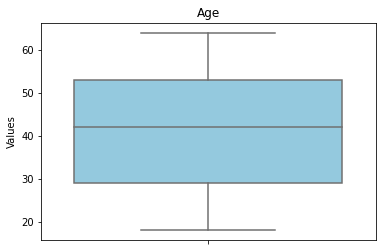

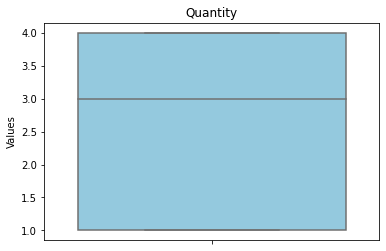

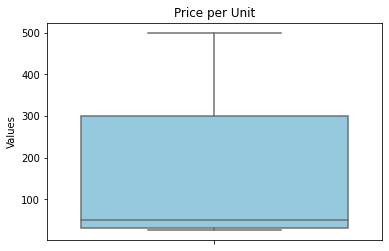

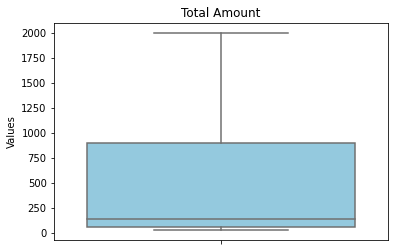

In [19]:
distribution_retail_sales_df = retail_sales_df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]

for col in distribution_retail_sales_df.columns:
    plt.figure()
    sns.boxplot(y=distribution_retail_sales_df[col], color='skyblue')
    plt.title(f'{col}')
    plt.ylabel('Values')
       
plt.show()

**Correlation Analysis**

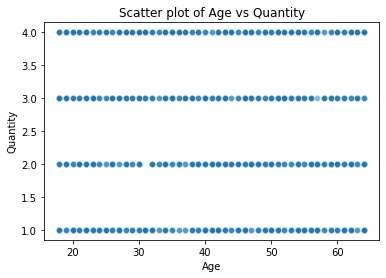

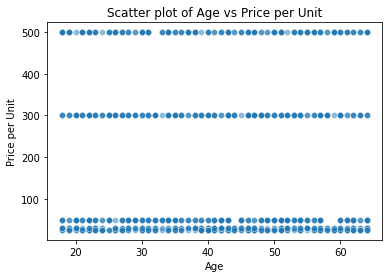

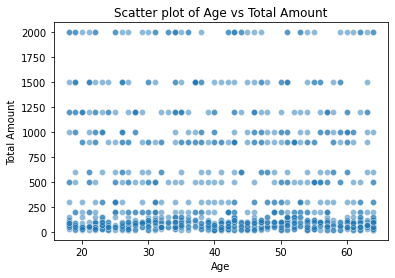

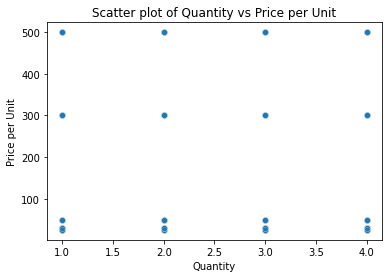

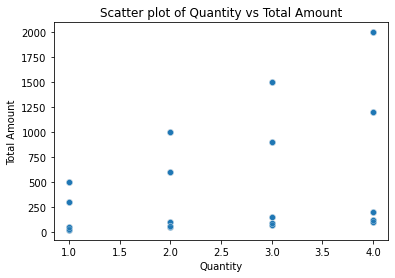

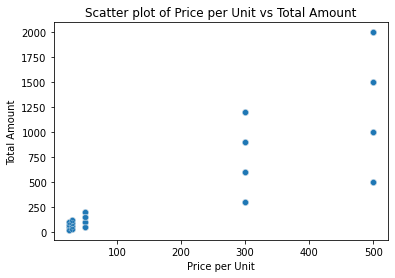

In [20]:
data2 = retail_sales_df
variables = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data2, x=variables[i], y=variables[j], alpha=0.5)
        plt.title(f'Scatter plot of {variables[i]} vs {variables[j]}')
        plt.xlabel(variables[i])
        plt.ylabel(variables[j])
        plt.show()

**Correlation matrix**

<AxesSubplot:>

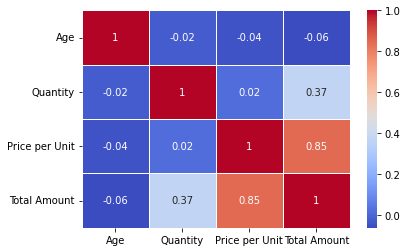

In [21]:
sns.heatmap(data=round(retail_sales_df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(),2),cmap='coolwarm',linewidth= 0.5,annot=True)

### Data Cleaning

In [22]:
retail_sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


**Change column name to lowercase**

In [23]:
retail_sales_df.rename(columns=lambda x: x.lower(), inplace=True)

**Clean white space by replace underscore**

In [24]:
retail_sales_df.rename(columns=lambda x: x.strip().replace(' ', '_'), inplace=True)
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


**Change data type of date : object --> datetime**

In [25]:
retail_sales_df['date'] = pd.to_datetime(retail_sales_df['date'])

In [26]:
retail_sales_df.dtypes

transaction_id               int64
date                datetime64[ns]
customer_id                 object
gender                      object
age                          int64
product_category            object
quantity                     int64
price_per_unit               int64
total_amount                 int64
dtype: object

### How does customer age and gender influence their purchasing behavior?

In [27]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [28]:
data3 = retail_sales_df[['product_category', 'age']]
product_age = pd.DataFrame(data3)

frequency_table2 = {}
categories = ['Beauty', 'Clothing', 'Electronics']

for category in categories:
    for index, row in product_age.iterrows():
        if row['product_category'] == category:
            age = row['age']
            if category in frequency_table2:
                if age in frequency_table2[category]:
                    frequency_table2[category][age] += 1
                else:
                    frequency_table2[category][age] = 1
            else:
                frequency_table2[category] = {age: 1}

print("Frequency table for each category:")
for category, ages in frequency_table2.items():
    print("Category:", category)
    for age, count in ages.items():
        print("Age:", age, " - Count:", count)


Frequency table for each category:
Category: Beauty
Age: 34  - Count: 12
Age: 30  - Count: 12
Age: 45  - Count: 9
Age: 35  - Count: 6
Age: 50  - Count: 5
Age: 64  - Count: 10
Age: 38  - Count: 6
Age: 43  - Count: 6
Age: 39  - Count: 10
Age: 58  - Count: 6
Age: 52  - Count: 6
Age: 18  - Count: 9
Age: 40  - Count: 4
Age: 27  - Count: 11
Age: 36  - Count: 4
Age: 31  - Count: 2
Age: 63  - Count: 3
Age: 21  - Count: 9
Age: 48  - Count: 5
Age: 56  - Count: 4
Age: 51  - Count: 8
Age: 61  - Count: 5
Age: 32  - Count: 7
Age: 19  - Count: 7
Age: 28  - Count: 6
Age: 47  - Count: 10
Age: 55  - Count: 7
Age: 22  - Count: 9
Age: 60  - Count: 5
Age: 25  - Count: 7
Age: 46  - Count: 13
Age: 59  - Count: 5
Age: 62  - Count: 8
Age: 54  - Count: 10
Age: 42  - Count: 9
Age: 20  - Count: 8
Age: 57  - Count: 9
Age: 23  - Count: 6
Age: 29  - Count: 4
Age: 26  - Count: 4
Age: 49  - Count: 5
Age: 24  - Count: 5
Age: 44  - Count: 2
Age: 41  - Count: 2
Age: 33  - Count: 3
Age: 37  - Count: 2
Age: 53  - Count: 2


In [29]:
category_by_age = pd.DataFrame(frequency_table2)\
.sort_values('Clothing', ascending=False)\
.reset_index()\
.rename(columns= {'index':'age'})\
.sort_values('age')\
.reset_index()\
.drop(columns= ['index'])\
.rename(columns= {'Beauty':'amount_beauty', 'Clothing':'amount_clothing', 'Electronics':'amount_electronics'})
category_by_age.head()

,age,amount_beauty,amount_clothing,amount_electronics
0,18,9,7,5
1,19,7,3,11
2,20,8,6,7
3,21,9,7,4
4,22,9,8,10


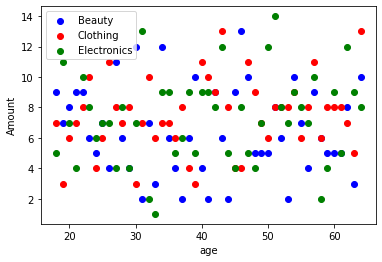

In [30]:
sns.scatterplot(x=category_by_age.age, s=50)
plt.scatter(category_by_age['age'], category_by_age['amount_beauty'], color='blue', label='Beauty')
plt.scatter(category_by_age['age'], category_by_age['amount_clothing'], color='red', label='Clothing')  # เพิ่มจุดจากคอลัมน์ 'amount_clothing'
plt.scatter(category_by_age['age'], category_by_age['amount_electronics'], color='green', label='Electronics')  # เพิ่มจุดจากคอลัมน์ 'amount_electronics'
plt.ylabel('Amount')
plt.legend()
plt.show()

In [31]:
# Create a function to segment customers by age.
def categorize_age(age):
    if age >= 18 and age <= 24:
        return 'Age:18-24'
    elif age >= 25 and age <= 34:
        return 'Age:25-34'
    elif age >= 35 and age <= 44:
        return 'Age:35-44'
    elif age >= 45 and age <= 54:
        return 'Age:45-54'
    elif age >= 55 and age <= 64:
        return 'Age:55-64'

# Create a new column in DataFrame named 'Age Group' and use the function categorize_age To divide into age groups
category_by_age['age_group'] = category_by_age['age'].apply(categorize_age)

category_by_age.head()

,age,amount_beauty,amount_clothing,amount_electronics,age_group
0,18,9,7,5,Age:18-24
1,19,7,3,11,Age:18-24
2,20,8,6,7,Age:18-24
3,21,9,7,4,Age:18-24
4,22,9,8,10,Age:18-24


In [32]:
retail_sales_df['age_group'] = retail_sales_df['age'].apply(categorize_age)
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [33]:
retail_sales_df.groupby(['age_group'])['age_group'].agg('count')

age_group
Age:18-24    149
Age:25-34    203
Age:35-44    207
Age:45-54    225
Age:55-64    216
Name: age_group, dtype: int64

In [34]:
# Find the sum of the number of products in each category divided by age.
sum_by_age_category = pd.DataFrame(category_by_age.groupby(['age_group'])\
                                   .agg({'amount_beauty': 'sum', 'amount_clothing': 'sum', 'amount_electronics': 'sum'})\
                                   .reset_index())\
                                   .sort_values('age_group')\
                                   .transpose()\
                                   .rename(columns= {0:'Age:18-24', 1:'Age:25-34', 2:'Age:35-44', 3:'Age:45-54', 4:'Age:55-64'})\
                                   .reset_index()\
                                   .drop(index=0)\
                                   .reset_index()\
                                   .drop(columns= ['level_0'])\
                                   .rename(columns= {'index':'amount_by_category'})
                                   
sum_by_age_category

,amount_by_category,Age:18-24,Age:25-34,Age:35-44,Age:45-54,Age:55-64
0,amount_beauty,53,68,51,73,62
1,amount_clothing,45,73,79,74,80
2,amount_electronics,51,62,77,78,74


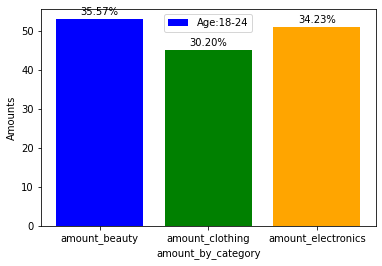

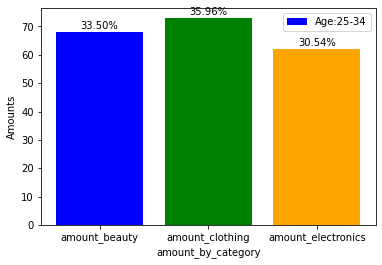

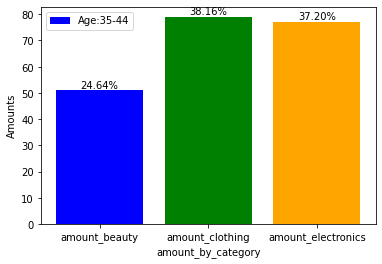

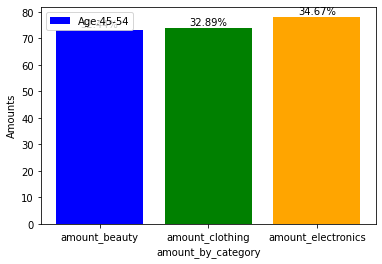

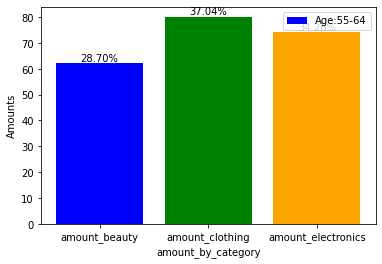

In [35]:
df1 = sum_by_age_category[['Age:18-24', 'Age:25-34', 'Age:35-44', 'Age:45-54', 'Age:55-64']]

for col in df1.columns:
    plt.bar(sum_by_age_category['amount_by_category'], df1[col], color=['blue', 'green', 'orange'], label=col)    
    plt.xlabel('amount_by_category')
    plt.ylabel('Amounts')
    plt.legend()
    for i, value in enumerate(df1[col]):
        percentage = (value / df1[col].sum()) * 100
        plt.text(i, value + 1, f'{percentage:.2f}%', ha='center')
    plt.show()

In [36]:
data4 = retail_sales_df[['product_category', 'gender']]
product_gender = pd.DataFrame(data4)

frequency_table3 = {}
categories = ['Beauty', 'Clothing', 'Electronics']

for category in categories:
    for index, row in product_gender.iterrows():
        if row['product_category'] == category:
            gender = row['gender']
            if category in frequency_table3:
                if gender in frequency_table3[category]:
                    frequency_table3[category][gender] += 1
                else:
                    frequency_table3[category][gender] = 1
            else:
                frequency_table3[category] = {gender: 1}

print("Frequency table for each category:")
for category, genders in frequency_table3.items():
    print("Category:", category)
    for gender, count in genders.items():
        print("Gender:", gender, " - Count:", count)


Frequency table for each category:
Category: Beauty
Gender: Male  - Count: 141
Gender: Female  - Count: 166
Category: Clothing
Gender: Female  - Count: 174
Gender: Male  - Count: 177
Category: Electronics
Gender: Male  - Count: 172
Gender: Female  - Count: 170


In [37]:
category_by_gender = pd.DataFrame(frequency_table3)\
.reset_index()\
.rename(columns= {'index':'gender', 'Beauty':'amount_beauty', 'Clothing':'amount_clothing', 'Electronics':'amount_electronics'})
category_by_gender

,gender,amount_beauty,amount_clothing,amount_electronics
0,Male,141,177,172
1,Female,166,174,170


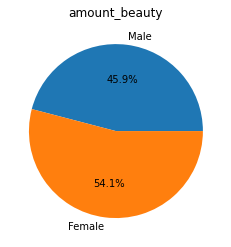

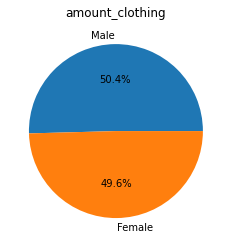

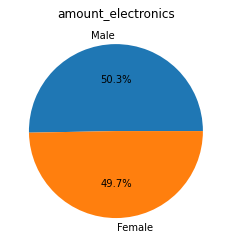

In [38]:
df2 = category_by_gender[['amount_beauty', 'amount_clothing', 'amount_electronics']]

for col in df2.columns:
    plt.figure()  
    plt.pie(df2[col], labels=category_by_gender['gender'], autopct='%1.1f%%')  
    plt.title(col)  
    plt.show()

**Explore Age Groups Customers**

Understanding Customers Behavior Across Age Groups: A Market Analysis provides an overview of shopping behaviors across different age groups as follows:

1. **Age Group 18-24:** Interested in beauty products, often seeking items that express self-identity and experimenting with new styles.

2. **Age Groups 25-34, 35-44, and 55-64:** Show preferences for clothing items that reflect their lifestyles and individuality, often choosing styles that align with their age and social status.

3. **Age Group 45-54:** Interested in electronic products, often seeking products that utilize technology to enhance efficiency and convenience in daily life.

**Exploring Gender Customers**

Understanding consumer behavior through the lens of gender reveals distinct shopping trends:

1. **Male Customers:** Show a preference for clothing and electronics, seeking stylish apparel and cutting-edge gadgets that align with their lifestyle.

2. **Female Customers:** Lean towards beauty products, seeking skincare and makeup items that enhance natural beauty and allow for self-expression.

**Summary: Understanding Customer Behavior Across Age Groups and Gender-based Preferences**

This summary describes the relationship between age and gender in shaping consumer behavior and preferences. It highlights how different age groups exhibit distinct tendencies in their purchasing patterns, with younger demographics often leaning towards beauty products and older age groups showing preferences for clothing and electronics. Additionally, it explores how gender influences consumer choices, with males typically favoring clothing and electronics while females gravitate towards beauty products. Recognizing these age and gender-based preferences allows businesses to tailor their marketing strategies and product offerings effectively, fostering stronger brand connections and driving sustainable growth in the market.

### Are there discernible patterns in sales across different time periods?

In [39]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [40]:
sales_pattern = retail_sales_df[['date', 'product_category', 'quantity', 'total_amount']]\
                .sort_values('date')\
                .reset_index()\
                .drop(columns= ['index'])
        
sales_pattern['month'] = sales_pattern['date'].dt.strftime('%B')
sales_pattern

,date,product_category,quantity,total_amount,month
0,2023-01-01,Beauty,3,1500,January
1,2023-01-01,Clothing,3,900,January
2,2023-01-01,Clothing,4,1200,January
3,2023-01-02,Electronics,3,90,January
4,2023-01-02,Beauty,1,25,January
...,...,...,...,...,...
995,2023-12-29,Beauty,2,600,December
996,2023-12-29,Beauty,3,1500,December
997,2023-12-31,Electronics,2,50,December
998,2024-01-01,Beauty,3,1500,January


In [41]:
total_sales_daily = pd.DataFrame(sales_pattern[['date', 'month', 'total_amount']]\
                    .groupby('date')['total_amount']\
                    .agg('sum'))\
                    .reset_index()
                    
total_sales_daily

,date,total_amount
0,2023-01-01,3600
1,2023-01-02,1765
2,2023-01-03,600
3,2023-01-04,1240
4,2023-01-05,1100
...,...,...
340,2023-12-27,700
341,2023-12-28,2075
342,2023-12-29,3400
343,2023-12-31,50


In [42]:
total_sales_monthly = pd.DataFrame(sales_pattern.groupby('month')['total_amount']
                                   .agg('sum'))\
                                   .reset_index()\
                                   .sort_values('total_amount', ascending=False)
total_sales_monthly

,month,total_amount
8,May,53150
10,October,46580
2,December,44690
3,February,44060
4,January,36980
1,August,36960
6,June,36715
5,July,35465
9,November,34920
0,April,33870


In [43]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
total_amount = [36980, 44060, 28990, 33870, 53150, 36715, 35465, 36960, 23620, 46580, 34920, 44690]

Text(0.5, 1.0, 'Overall Sales Monthly')

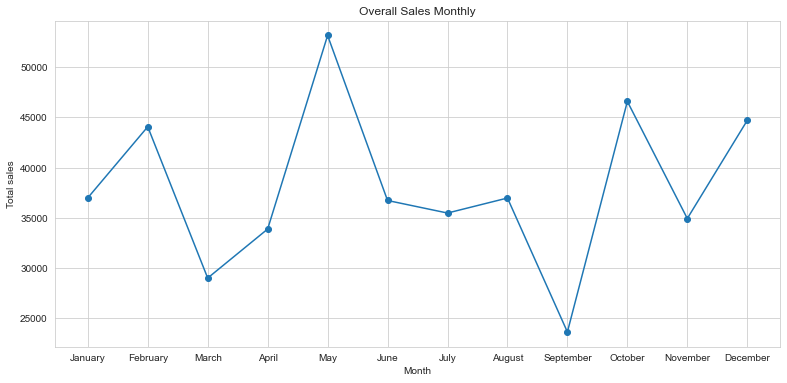

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(month, total_amount, marker= 'o')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.title("Overall Sales Monthly")

In [45]:
def month_to_quarter(month):
    if month in ['January','February','March']:
        return 'Q1'
    elif month in ['April', 'May', 'June']:
        return 'Q2'
    elif month in ['July', 'August', 'September']  :
        return 'Q3'
    elif month in ['October', 'November', 'December']:
        return 'Q4'

In [46]:
total_sales_monthly['quarter'] = total_sales_monthly['month'].apply(month_to_quarter)

total_sales_quarter = total_sales_monthly[['quarter', 'total_amount']]\
                      .groupby('quarter')['total_amount']\
                      .agg('sum')\
                      .reset_index()
total_sales_quarter

,quarter,total_amount
0,Q1,110030
1,Q2,123735
2,Q3,96045
3,Q4,126190


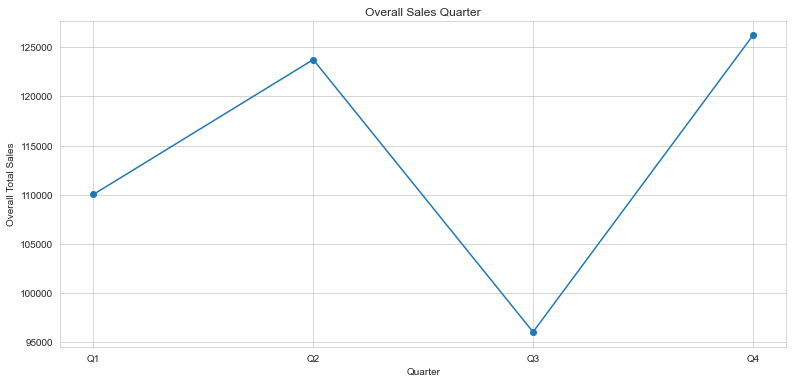

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(total_sales_quarter['quarter'], total_sales_quarter['total_amount'], marker='o')
plt.xlabel('Quarter')
plt.ylabel('Overall Total Sales')
plt.title('Overall Sales Quarter')
plt.show()

In [48]:
# Create a list of product categories
categories = ['Beauty', 'Clothing', 'Electronics']

# Create a list of DataFrames for each product category.
sales_by_category = {}
for category in categories:
    sales_by_category[category] = sales_pattern[sales_pattern['product_category'] == category]

# Display DataFrame for each product category.
for category, df in sales_by_category.items():
    print(f"Sales for {category}:")
    print(df)
    print()


Sales for Beauty:
          date product_category  quantity  total_amount     month
0   2023-01-01           Beauty         3          1500   January
4   2023-01-02           Beauty         1            25   January
7   2023-01-03           Beauty         2           600   January
8   2023-01-04           Beauty         2          1000   January
10  2023-01-04           Beauty         3            90   January
..         ...              ...       ...           ...       ...
988 2023-12-27           Beauty         2           100  December
993 2023-12-29           Beauty         4          1200  December
995 2023-12-29           Beauty         2           600  December
996 2023-12-29           Beauty         3          1500  December
998 2024-01-01           Beauty         3          1500   January

[307 rows x 5 columns]

Sales for Clothing:
          date product_category  quantity  total_amount     month
1   2023-01-01         Clothing         3           900   January
2   2023-01-0

In [49]:
sale_beauty = sales_pattern[ sales_pattern['product_category'] == 'Beauty' ]
sale_clothing = sales_pattern[ sales_pattern['product_category'] == 'Clothing' ]
sale_electronics = sales_pattern[ sales_pattern['product_category'] == 'Electronics' ]

In [50]:
sale_beauty_monthly = pd.DataFrame(sale_beauty.groupby('month')['total_amount']
                      .agg('sum'))\
                      .reset_index()
sale_clothing_monthly = pd.DataFrame(sale_clothing.groupby('month')['total_amount']
                        .agg('sum'))\
                        .reset_index()
sale_electronics_monthly = pd.DataFrame(sale_electronics.groupby('month')['total_amount']
                           .agg('sum'))\
                           .reset_index()
merged_sale_category_monthly = sale_beauty_monthly\
                               .merge(sale_clothing_monthly, on='month')\
                               .merge(sale_electronics_monthly, on='month')\
                               .rename(columns= {'total_amount_x':'sales_beauty', 'total_amount_y':'sale_clothing', 'total_amount':'sale_electronics'})

merged_sale_category_monthly

,month,sales_beauty,sale_clothing,sale_electronics
0,April,11905,13940,8025
1,August,9790,12455,14715
2,December,12400,12070,20220
3,February,14035,14560,15465
4,January,13930,13125,9925
5,July,16090,8250,11125
6,June,10995,10170,15550
7,March,10545,15065,3380
8,May,12450,17455,23245
9,November,9700,15200,10020


In [51]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
total_sale_beauty = [13930, 14035, 10545, 11905, 12450, 10995, 16090, 9790, 6320, 15355, 9700, 12400]
total_sale_clothing = [13125, 14560, 15065, 13940, 17455, 10170, 8250, 12455, 9975, 13315, 15200, 12070]
total_sale_electronics = [9925, 15465, 3380, 8025, 23245, 15550, 11125, 14715, 7325, 17910, 10020, 20220]

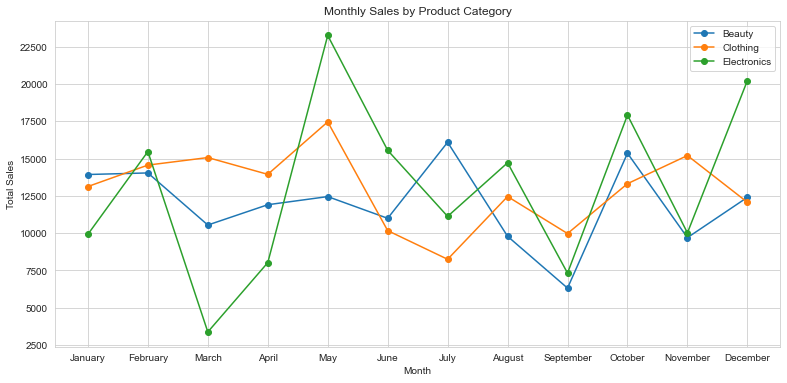

In [52]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(month, total_sale_beauty, marker='o')
plt.plot(month, total_sale_clothing, marker='o')
plt.plot(month, total_sale_electronics, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(['Beauty', 'Clothing', 'Electronics'])
plt.title('Monthly Sales by Product Category')
plt.show()

In [53]:
merged_sale_category_monthly['quarter'] = merged_sale_category_monthly['month'].apply(month_to_quarter)
merged_sale_category_monthly.reset_index().drop(columns= ['index']).sort_values('quarter')

,month,sales_beauty,sale_clothing,sale_electronics,quarter
3,February,14035,14560,15465,Q1
4,January,13930,13125,9925,Q1
7,March,10545,15065,3380,Q1
0,April,11905,13940,8025,Q2
6,June,10995,10170,15550,Q2
8,May,12450,17455,23245,Q2
1,August,9790,12455,14715,Q3
5,July,16090,8250,11125,Q3
11,September,6320,9975,7325,Q3
2,December,12400,12070,20220,Q4


In [54]:
merged_sale_category_quarter = merged_sale_category_monthly[['quarter', 'sales_beauty', 'sale_clothing', 'sale_electronics']]\
                               .groupby('quarter')[['sales_beauty', 'sale_clothing', 'sale_electronics']]\
                               .agg('sum')\
                               .reset_index()
merged_sale_category_quarter

,quarter,sales_beauty,sale_clothing,sale_electronics
0,Q1,38510,42750,28770
1,Q2,35350,41565,46820
2,Q3,32200,30680,33165
3,Q4,37455,40585,48150


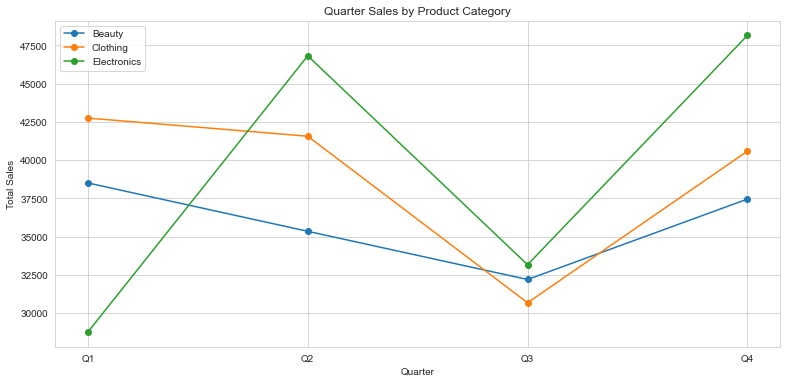

In [55]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sales_beauty'], marker='o')
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sale_clothing'], marker='o')
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sale_electronics'], marker='o')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(['Beauty', 'Clothing', 'Electronics'])
plt.title('Quarter Sales by Product Category')
plt.show()

**Analyzing and Reporting Sales Trends Across Different Time Periods**

Analyzing sales data across different time periods is highly beneficial for predicting trends and formulating marketing strategies for the future. Below is a summary of the study and analysis of sales data for a wide range of market products during various time periods between January 2023 and January 2024:

### 1. Monthly Trends:
- There is a clear trend in sales during the months of May (Q2), October (Q4), and December (Q4), with the top 3 highest sales figures being 53150, 46580, and 44690 respectively.
- September has the lowest sales figure at 23,620.

### 2. Quarterly Trends:
- Sales in Quarter 3 show a significant decrease compared to other quarters, with the lowest sales figure.
- Sales of electronics products in the 4th quarter significantly increased, disrupting the statistics higher than Quarters 1, 2, and 3.

### 3. Trends by Product Category:
- In Quarter 1, Clothing have the highest sales compared to Beauty and Electronics.
- In Quarters 2, 3, and 4, Electronics have peak sales, although there is a significant decrease in sales of all product types in Quarter 3.

### 4. Highest Sales in Each Quarter by Product Category:
- **Beauty:**
    - Q1 (February): 14035
    - Q2 (May): 12450
    - Q3 (July): 16090
    - Q4 (October): 15355
- **Clothing:**
    - Q1 (March): 15065
    - Q2 (May): 17455
    - Q3 (August): 12455
    - Q4 (November): 15420
- **Electronics:**
    - Q1 (February): 15465
    - Q2 (May): 23245
    - Q3 (August): 14715
    - Q4 (December): 20220

Analyzing this data helps us understand the trends in product sales over time and by product category, enabling more efficient business planning and decision-making. Adapting sales and marketing strategies based on market trends can maximize revenue opportunities and enhance business efficiency in the long run.

### Which product categories hold the highest appeal among customers?

In [56]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [57]:
quantity_by_category = retail_sales_df[['product_category', 'quantity', 'price_per_unit']]
quantity_by_category

,product_category,quantity,price_per_unit
0,Beauty,3,50
1,Clothing,2,500
2,Electronics,1,30
3,Clothing,1,500
4,Beauty,2,50
...,...,...,...
995,Clothing,1,50
996,Beauty,3,30
997,Beauty,4,25
998,Electronics,3,50


In [58]:
sum_quantity_by_category = pd.DataFrame(quantity_by_category.groupby('product_category')['quantity']
                                        .agg('sum'))\
                                        .reset_index()\
                                        .sort_values('quantity')
sum_quantity_by_category

,product_category,quantity
0,Beauty,771
2,Electronics,849
1,Clothing,894


Text(0.5, 1.0, 'Quantity by Product Category')

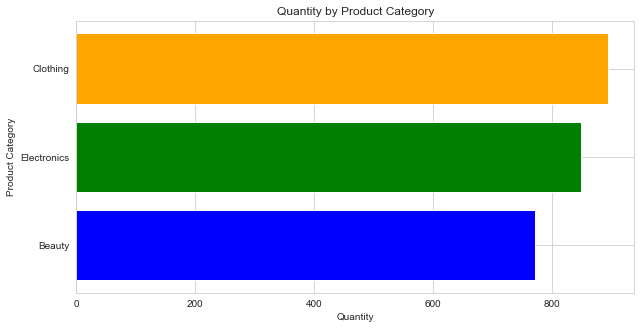

In [59]:
plt.figure(figsize=(10, 5))
plt.barh(sum_quantity_by_category['product_category'],  sum_quantity_by_category['quantity'], color=['blue', 'green', 'orange'])
plt.ylabel('Product Category')
plt.xlabel('Quantity')
plt.title('Quantity by Product Category')

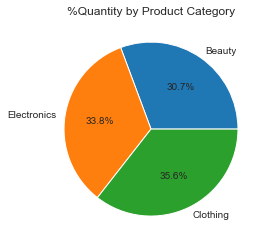

In [60]:
plt.figure()  
plt.pie(sum_quantity_by_category['quantity'], labels=sum_quantity_by_category['product_category'], autopct='%1.1f%%')  
plt.title('%Quantity by Product Category')  
plt.show()

In [61]:
quantity_by_category.head()

,product_category,quantity,price_per_unit
0,Beauty,3,50
1,Clothing,2,500
2,Electronics,1,30
3,Clothing,1,500
4,Beauty,2,50


In [62]:
quantity_product_by_category_and_price_per_unit = pd.DataFrame(frequency_table1)\
                                                    .reset_index()\
                                                    .rename(columns= {'index':'price_per_unit',
                                                                      'Beauty':'amount_beauty',
                                                                      'Clothing':'amount_clothing',
                                                                      'Electronics':'amount_electronics'})
quantity_product_by_category_and_price_per_unit

,price_per_unit,amount_beauty,amount_clothing,amount_electronics
0,50,67,75,69
1,30,56,65,62
2,25,63,75,72
3,500,68,64,67
4,300,53,72,72


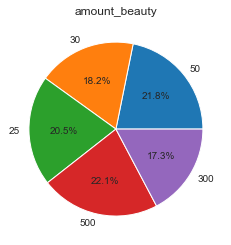

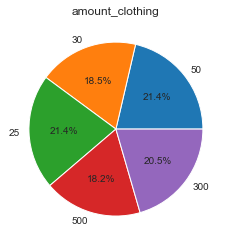

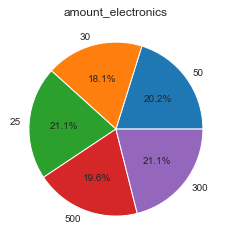

In [63]:
df9 = quantity_product_by_category_and_price_per_unit[['amount_beauty', 'amount_clothing', 'amount_electronics']]

for col in df9.columns:
    plt.figure()  
    plt.pie(df9[col], labels=quantity_product_by_category_and_price_per_unit['price_per_unit'], autopct='%1.1f%%')  
    plt.title(col)  
    plt.show()

**Analysis of Product Categories Popularity**

Studying product popularity in the market is crucial for businesses to adapt to customer demand. This analysis provides insights for marketing strategies and future product development.

The survey reveals three most popular product categories: Clothing (35.6%), Electronics (33.8%), and Beauty (30.7%).

**When delving into purchase behavior by price per item, interesting trends emerge:**

- For Clothing, items priced at 25 and 50 are most popular, at 21.4%, while those priced at 500 are least popular, at 18.2%.

- For Electronics, items priced at 25 and 300 are most popular, at 21.1%, while those priced at 30 are least popular, at 18.1%.

- Lastly, for Beauty products, items priced at 500 are most popular, at 22.1%, while those priced at 300 are least popular, at 17.3%.

This analysis underscores the importance of understanding customer preferences by category and price range. Businesses can leverage this data for effective marketing strategies and product development tailored to customer needs.

### What are the relationships between age, spending, and product preferences?

In [64]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [65]:
relation = retail_sales_df[['gender', 'age', 'product_category', 'quantity', 'total_amount', 'age_group']]
relation

,gender,age,product_category,quantity,total_amount,age_group
0,Male,34,Beauty,3,150,Age:25-34
1,Female,26,Clothing,2,1000,Age:25-34
2,Male,50,Electronics,1,30,Age:45-54
3,Male,37,Clothing,1,500,Age:35-44
4,Male,30,Beauty,2,100,Age:25-34
...,...,...,...,...,...,...
995,Male,62,Clothing,1,50,Age:55-64
996,Male,52,Beauty,3,90,Age:45-54
997,Female,23,Beauty,4,100,Age:18-24
998,Female,36,Electronics,3,150,Age:35-44


In [66]:
overall_spending_agegroup = pd.DataFrame(relation.groupby('age_group')['total_amount'].agg('sum')).reset_index()
overall_spending_agegroup

,age_group,total_amount
0,Age:18-24,74650
1,Age:25-34,97090
2,Age:35-44,96835
3,Age:45-54,97235
4,Age:55-64,90190


In [67]:
customer_18_24 = relation[ relation['age_group'] == 'Age:18-24' ].sort_values('product_category')
customer_25_34 = relation[ relation['age_group'] == 'Age:25-34' ].sort_values('product_category')
customer_35_44 = relation[ relation['age_group'] == 'Age:35-44' ].sort_values('product_category')
customer_45_54 = relation[ relation['age_group'] == 'Age:45-54' ].sort_values('product_category')
customer_55_64 = relation[ relation['age_group'] == 'Age:55-64' ].sort_values('product_category')

In [68]:
customer_18_24.head()

,gender,age,product_category,quantity,total_amount,age_group
997,Female,23,Beauty,4,100,Age:18-24
668,Male,24,Beauty,4,1200,Age:18-24
446,Male,22,Beauty,4,2000,Age:18-24
643,Male,23,Beauty,3,75,Age:18-24
239,Female,23,Beauty,1,300,Age:18-24


In [69]:
customer_18_24_category = pd.DataFrame(customer_18_24.groupby('product_category')['total_amount'].agg('sum').reset_index())
customer_25_34_category = pd.DataFrame(customer_25_34.groupby('product_category')['total_amount'].agg('sum').reset_index())
customer_35_44_category = pd.DataFrame(customer_35_44.groupby('product_category')['total_amount'].agg('sum').reset_index())
customer_45_54_category = pd.DataFrame(customer_45_54.groupby('product_category')['total_amount'].agg('sum').reset_index())
customer_55_64_category = pd.DataFrame(customer_55_64.groupby('product_category')['total_amount'].agg('sum').reset_index())

In [70]:
customer_55_64_category

,product_category,total_amount
0,Beauty,20670
1,Clothing,31310
2,Electronics,38210


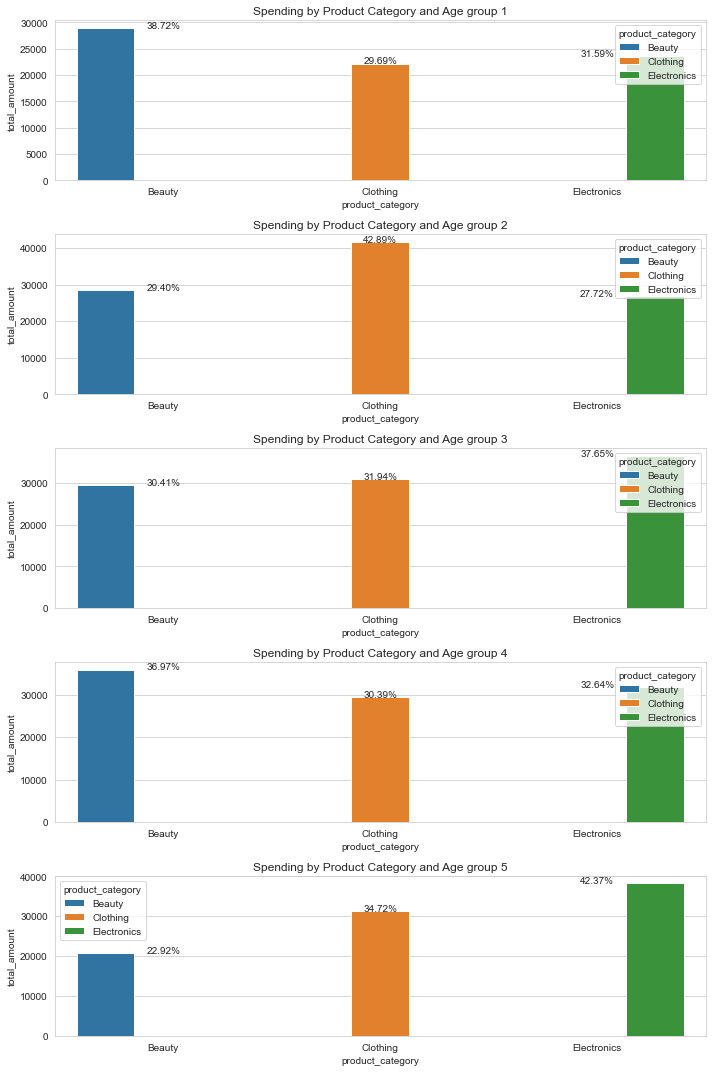

In [71]:
customer_age_category_df = [customer_18_24_category, customer_25_34_category, customer_35_44_category, customer_45_54_category, customer_55_64_category]

# Create a subplot with multiple rows.
fig, axes = plt.subplots(nrows=len(customer_age_category_df), figsize=(10, 15))

# Loop to create bar graphs for each age group.
for i, df in enumerate(customer_age_category_df):
    sns.barplot(x='product_category', y='total_amount', hue='product_category', data=df, ax=axes[i])
    axes[i].set_title(f'Spending by Product Category and Age group {i+1}')
    for j, value in enumerate(df['total_amount']):
        percentage = (value / df['total_amount'].sum()) * 100
        axes[i].text(j, value + 1, f'{percentage:.2f}%', ha='center')
    
    
plt.tight_layout()
plt.show()

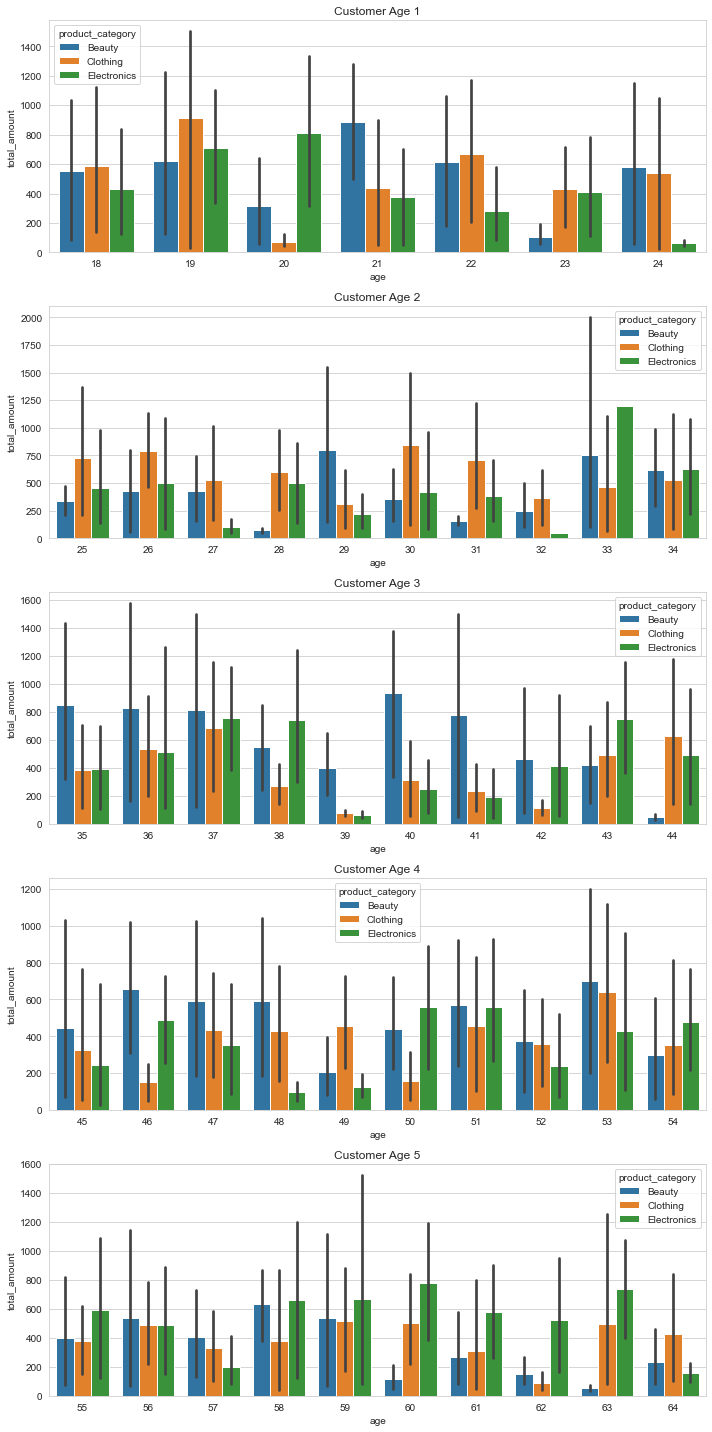

In [72]:
customer_age_df = [customer_18_24, customer_25_34, customer_35_44, customer_45_54, customer_55_64]

# Create a subplot with multiple rows. 
fig, axes = plt.subplots(nrows=len(customer_age_df), figsize=(10, 20))

# Loop to create bar graphs for each age group.
for i, df in enumerate(customer_age_df):
    sns.barplot(x='age', y='total_amount', hue='product_category', data=df, ax=axes[i])
    axes[i].set_title(f'Customer Age {i+1}')

plt.tight_layout()
plt.show()

**Analyzing the Relationship Between Age, Spending, and Product Preferences**

Understanding how age influences spending behavior and product preferences is crucial for businesses to tailor their marketing strategies effectively. By segmenting customers into five age groups: 18-24, 25-34, 35-44, 45-54, and 55-64, can uncover insightful patterns.

**The survey findings indicate the percentage of spending allocated to each product category among different age groups as follows:**

1. Customers aged 45-54: 21.32% (97235)
2. Customers aged 25-34: 21.29% (97090)
3. Customers aged 35-44: 21.24% (96835)
4. Customers aged 55-64: 19.78% (90190)
5. Customers aged 18-24: 16.37% (74650)

**Further analysis reveals the preferred product categories within each age group:**

- The 18-24 age group (38.72%, 28905) and 45-54 age group (36.97%, 35950) show a preference for beauty products.
- The 25-34 age group (42.89%, 41640) leans towards clothing products.
- The 35-44 age group (37.65%, 36460) and 55-64 age group (42.37%, 38210) favor electronics.

These findings highlight distinct preferences across different age segments. Businesses can utilize this information to tailor marketing campaigns and product offerings to specific age demographics, thereby maximizing customer engagement and satisfaction. Understanding the interplay between age, spending behavior, and product preferences is essential for businesses seeking to thrive in today's competitive market landscape.

### How do customers adapt their shopping habits during seasonal trends?

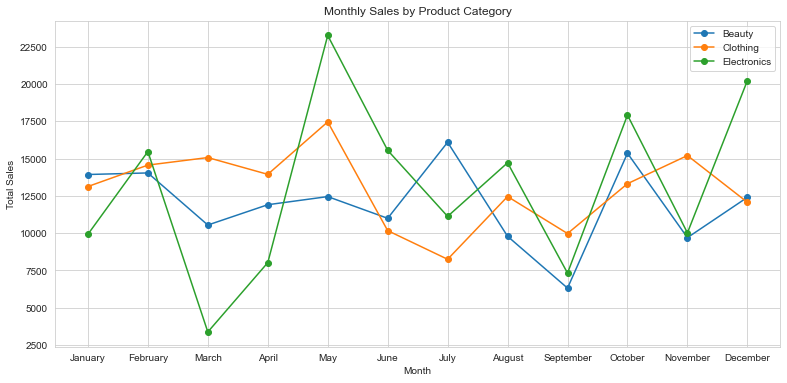

In [73]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(month, total_sale_beauty, marker='o')
plt.plot(month, total_sale_clothing, marker='o')
plt.plot(month, total_sale_electronics, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(['Beauty', 'Clothing', 'Electronics'])
plt.title('Monthly Sales by Product Category')
plt.show()

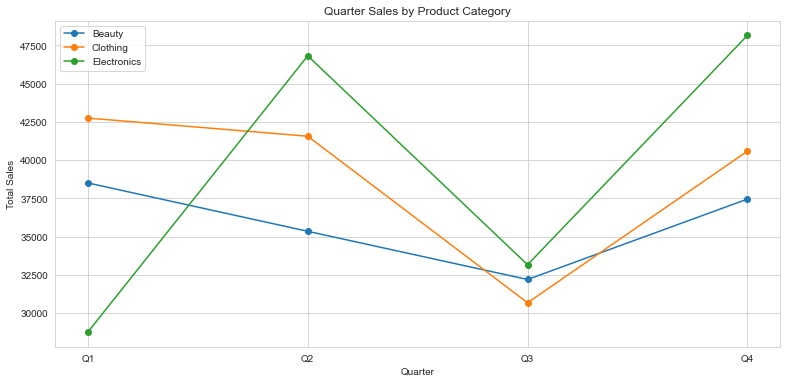

In [74]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sales_beauty'], marker='o')
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sale_clothing'], marker='o')
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sale_electronics'], marker='o')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(['Beauty', 'Clothing', 'Electronics'])
plt.title('Quarter Sales by Product Category')
plt.show()

**Adapting Customer Purchasing Behavior Across Seasons**

Analyzing customer purchasing behavior across seasons reveals distinct trends and adaptations in shopping habits. By delving into data and understanding how customers adjust their buying patterns, businesses can tailor marketing strategies and product offerings more effectively.

**Adapting Purchasing Habits:**
1. **Q1-Q2:**
   - Analyze the increase in sales of electronics and decrease in other categories.
   - Provide clear insights into factors driving these changes, such as social and market influences.

2. **Q2-Q3:**
   - Explain the decline in purchases, especially in clothing and electronics.
   - Explore factors causing these changes, such as economic conditions and customer fashion trends.

3. **Q3-Q4:**
   - Discuss the increase in sales during this season.
   - Provide information on the return to purchasing behavior and analyze the influencing factors.

**Conclusion:**
Through data analysis and interpretation, it's evident that customer purchasing behavior across seasons significantly impacts sales trends. To effectively respond to these changes, businesses must adapt marketing strategies and product offerings appropriately. Adapting to customer preferences and increasing sales in the future will depend on the ability to adjust marketing strategies and product offerings to match changing trends in customer behavior.

### Are there distinct purchasing behaviors based on the number of items bought per transaction?

In [75]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [76]:
quantity_per_transaction = retail_sales_df[['transaction_id', 'product_category', 'quantity', 'price_per_unit']]
quantity_per_transaction.head()

,transaction_id,product_category,quantity,price_per_unit
0,1,Beauty,3,50
1,2,Clothing,2,500
2,3,Electronics,1,30
3,4,Clothing,1,500
4,5,Beauty,2,50


In [77]:
beauty_quantity_per_transaction = pd.DataFrame(quantity_per_transaction[quantity_per_transaction['product_category'] == 'Beauty' ]\
                                               .groupby('quantity')['quantity']\
                                               .agg('count'))\
                                               .rename(columns= {'quantity':'beauty_amount_quantity'})\
                                               .reset_index()
clothing_quantity_per_transaction = pd.DataFrame(quantity_per_transaction[quantity_per_transaction['product_category'] == 'Clothing' ]\
                                                 .groupby('quantity')['quantity']\
                                                 .agg('count'))\
                                                 .rename(columns= {'quantity':'clothing_amount_quantity'})\
                                                 .reset_index()
electronics_quantity_per_transaction = pd.DataFrame(quantity_per_transaction[quantity_per_transaction['product_category'] == 'Electronics' ]\
                                                    .groupby('quantity')['quantity']\
                                                    .agg('count'))\
                                                    .rename(columns= {'quantity':'electronics_amount_quantity'})\
                                                    .reset_index()

In [78]:
beauty_quantity_per_transaction

,quantity,beauty_amount_quantity
0,1,74
1,2,75
2,3,85
3,4,73


In [79]:
count_quantity_per_transaction = beauty_quantity_per_transaction.merge(clothing_quantity_per_transaction, on='quantity').merge(electronics_quantity_per_transaction, on='quantity')
count_quantity_per_transaction

,quantity,beauty_amount_quantity,clothing_amount_quantity,electronics_amount_quantity
0,1,74,88,91
1,2,75,80,88
2,3,85,86,70
3,4,73,97,93


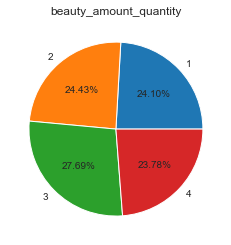

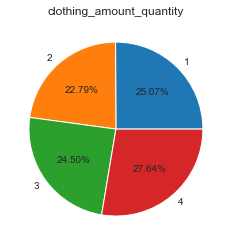

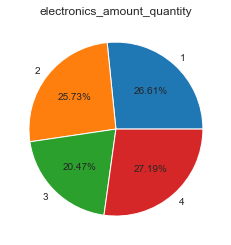

In [80]:
df10 = count_quantity_per_transaction[['beauty_amount_quantity', 'clothing_amount_quantity', 'electronics_amount_quantity']]

for col in df10.columns:
    plt.figure()  
    plt.pie(df10[col], labels=count_quantity_per_transaction['quantity'], autopct='%1.2f%%')  
    plt.title(col)  
    plt.show()

In [81]:
# list of product category and quantity
product_category = ['Beauty', 'Clothing', 'Electronics']
quantity = [1, 2, 3, 4]

# Create Dataframe for price/unit in each product categoryสร้าง DataFrame สำหรับการขายสินค้าแต่ละหมวดหมู่
all_quantity_per_transaction = {}

for category in product_category:
    for qty in quantity:
        # Select data from the table that matches the product category and specified quantity.
        filtered_data = quantity_per_transaction[
            (quantity_per_transaction['product_category'] == category) &
            (quantity_per_transaction['quantity'] == qty)
        ]
        # Group data by unit price and count the number of items in each group.
        group_count = filtered_data.groupby('price_per_unit')['price_per_unit'].agg('count')
        # Add data into dictionary
        all_quantity_per_transaction[(category, qty)] = group_count

# Create Dataframe from dictionary
all_quantity_per_transaction_df = pd.DataFrame(all_quantity_per_transaction)

print(all_quantity_per_transaction_df)

               Beauty             Clothing             Electronics            
                    1   2   3   4        1   2   3   4           1   2   3   4
price_per_unit                                                                
25                 18  11  19  15       21  19  15  20          12  31   9  20
30                 16  13  17  10       13  17  16  19          22  15  11  14
50                 16  20  10  21       20  17  17  21          18  16  15  20
300                10  11  18  14       14  15  23  20          22   9  21  20
500                14  20  21  13       20  12  15  17          17  17  14  19


**Analyzing Purchasing Behavior Based on Number of Items Bought per Transaction**

The question of whether there are distinct purchasing behaviors based on the number of items bought per transaction has been a subject of investigation. Customers exhibit varying buying patterns depending on the number of items purchased per transaction across three different product categories.

Looking at the overall number of transactions without considering the price per item, it's evident that customers prefer to purchase 3 items per transaction in the Beauty category, while for Clothing and Electronics, the preference is for 4 items per transaction.

**Further examination into the number of transactions, categorized by price per item of the products, reveals intriguing insights:**

**Beauty Products:**
- Customers prefer to purchase Beauty products priced at 25, 30, 300, and 500 in quantities of 3 items each, and 50 in quantities of 4 items each.

**Clothing Products:**
- Customers prefer to purchase Clothing products priced at 25 and 500 in quantities of 1 item each, priced at 300 in quantities of 3 items each, and priced at 30 and 50 in quantities of 4 items each.

**Electronics Products:**
- Customers prefer to purchase Electronics products priced at 30 and 300 in quantities of 1 item each, priced at 25 in quantities of 2 items each, and priced at 50 and 500 in quantities of 4 items each.

These findings highlight the nuanced purchasing behaviors of customers based on both the number of items bought per transaction and the price per item. Understanding these patterns can assist businesses in tailoring their marketing strategies and product offerings to better meet customer preferences and increase sales.

### What insights can be gleaned from the distribution of product prices within each category?

In [82]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [83]:
product_prices_by_category = retail_sales_df[['date', 'gender', 'age', 'product_category', 'quantity', 'price_per_unit', 'total_amount', 'age_group']]
product_prices_by_category.head()

,date,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,2023-11-24,Male,34,Beauty,3,50,150,Age:25-34
1,2023-02-27,Female,26,Clothing,2,500,1000,Age:25-34
2,2023-01-13,Male,50,Electronics,1,30,30,Age:45-54
3,2023-05-21,Male,37,Clothing,1,500,500,Age:35-44
4,2023-05-06,Male,30,Beauty,2,50,100,Age:25-34


In [84]:
product_prices_by_category[ product_prices_by_category['product_category'] == 'Beauty'].head()

,date,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,2023-11-24,Male,34,Beauty,3,50,150,Age:25-34
4,2023-05-06,Male,30,Beauty,2,50,100,Age:25-34
5,2023-04-25,Female,45,Beauty,1,30,30,Age:45-54
11,2023-10-30,Male,35,Beauty,3,25,75,Age:35-44
20,2023-01-14,Female,50,Beauty,1,500,500,Age:45-54


In [85]:
df99 = pd.DataFrame(product_prices_by_category.groupby(['product_category', 'price_per_unit'])['quantity']\
                    .sum())\
                    .reset_index()\
                    .sort_values('price_per_unit')
df99['total_sales'] = df99['price_per_unit'] * df99['quantity']
df99

,product_category,price_per_unit,quantity,total_sales
0,Beauty,25,157,3925
5,Clothing,25,184,4600
10,Electronics,25,181,4525
1,Beauty,30,133,3990
6,Clothing,30,171,5130
11,Electronics,30,141,4230
2,Beauty,50,170,8500
7,Clothing,50,189,9450
12,Electronics,50,175,8750
3,Beauty,300,142,42600


**1. Top-Selling Items at Same Price levels**

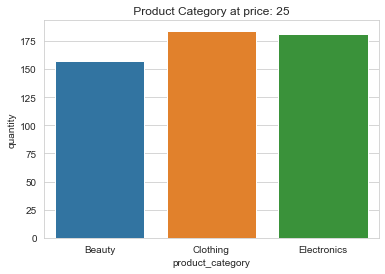

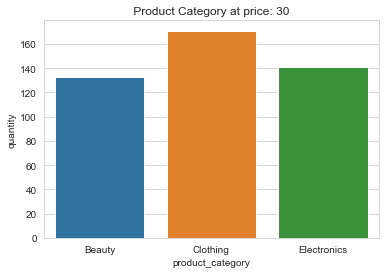

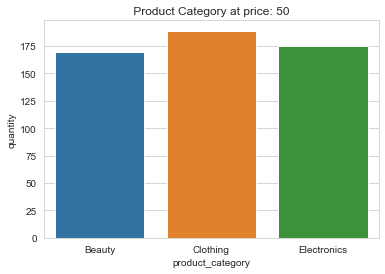

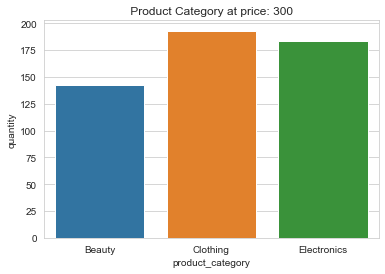

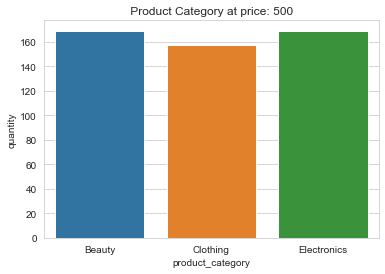

In [86]:
prices = [25,30,50,300,500]

for price in prices:
    sns.barplot(x='product_category', y='quantity', data=df99[ df99['price_per_unit'] == price ])
    plt.title(f" Product Category at price: {price} ")
    plt.show()

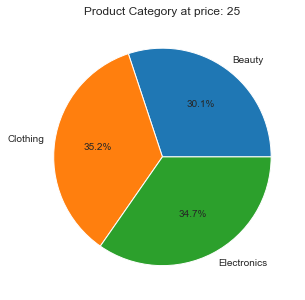

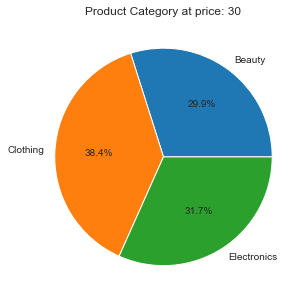

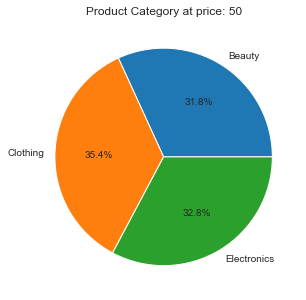

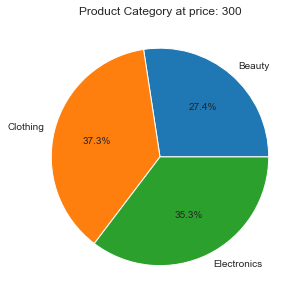

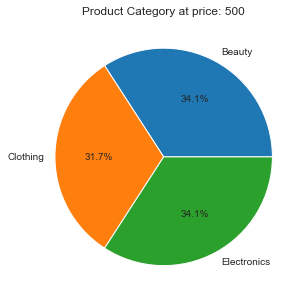

In [87]:
for price in prices:
    subset_data = df99[df99['price_per_unit'] == price]
    quantity_by_category = subset_data.groupby('product_category')['quantity'].sum()
    plt.figure(figsize=(5, 5))
    plt.pie(quantity_by_category, labels=quantity_by_category.index, autopct='%1.1f%%')
    plt.title(f"Product Category at price: {price}")
    plt.show()

**2. Sales Volume Across Price levels, Compared within Each Product Category**

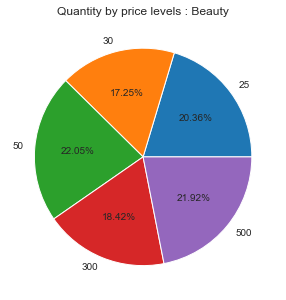

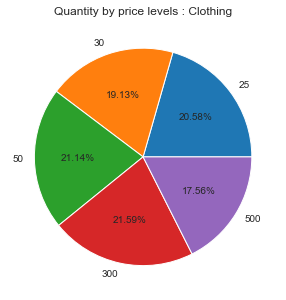

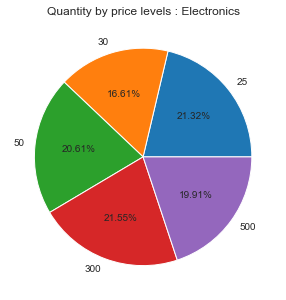

In [88]:
categories = ['Beauty', 'Clothing', 'Electronics']

for category in categories:
    subset_data = df99[df99['product_category'] == category]
    quantity_by_category = subset_data.groupby('price_per_unit')['quantity'].sum()
    plt.figure(figsize=(5, 5))
    plt.pie(quantity_by_category, labels=quantity_by_category.index, autopct='%1.2f%%')
    plt.title(f"Quantity by price levels : {category}")
    plt.show()

**Unveiling Insights from Product Price Distribution within Each Category**

Exploring data insights to answer the question "What insights can be gleaned from the distribution of product prices within each category?" reveals intriguing patterns that shed light on consumer behavior and preferences. Here's a breakdown of the findings:

1. **Top-Selling Items at Same Price levels:**
   - Within the Clothing category, the highest-selling items are priced at 25, 30, 50, and 300. Sales figures indicate 184 (35.2%), 171 (38.4%), 189 (35.4%), and 193 (37.3%) units sold, respectively.
   - Interestingly, both Beauty and Electronics categories perform exceptionally well at a price point of 500, with an equal share of 34.1%, totaling 169 units each.

2. **Sales Volume Across Price levels, Compared within Each Product Category:**
   - In the Beauty category, products sell best at prices of 50 -> 500 -> 25 -> 300 -> 30.
   - For Clothing items, the highest sales are observed at prices of 300 -> 50 -> 25 -> 30 -> 500.
   - Similarly, Electronics products perform well at prices of 300 -> 25 -> 50 -> 500 -> 30.

These insights provide valuable information for businesses to understand consumer preferences and tailor their product offerings and marketing strategies accordingly. By aligning product pricing with customer preferences, businesses can optimize sales and enhance customer satisfaction, ultimately driving growth and success in the market.